# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 9</span>


### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the $n^{th}$ city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

**Alteratively**, we can express a possible path also via a configuration of a $N\times N$ 2D *Ising-like* model with the following bonds:
1. any row must have one and at most one up spin
2. any column must have one and at most one up spin,

all the other spins are down.

We can represent such a configuration with a $N\times N$ matrix whose elements are 1 (spin up) or 0 (spin down); for example, in the case of a TSP with 5 cities:
$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 0\\
\end{bmatrix}
$$

You can interpret this matrix in the following way:
- column index represents time of visit: first colum = first visit, etc.
- row index represents the ordered sequence of cities: first row = first city, etc.

the previous matrix thus refers to the following sequence:

$$
\vec{x}_1, \vec{x}_2, \vec{x}_3, \vec{x}_4, \vec{x}_5 = 
\vec{c}_{1}, \vec{c}_{3}, \vec{c}_{5}, \vec{c}_{4}, \vec{c}_{2}
$$

and thus to the following *cost* of the path:

$$
L^{(2)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3|^2 + |\vec{c}_3-\vec{c}_5|^2 + |\vec{c}_5-\vec{c}_4|^2 +
|\vec{c}_4-\vec{c}_2|^2 + |\vec{c}_2-\vec{c}_1|^2
$$

or
$$
L^{(1)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3| + |\vec{c}_3-\vec{c}_5| + |\vec{c}_5-\vec{c}_4| +
|\vec{c}_4-\vec{c}_2| + |\vec{c}_2-\vec{c}_1|
$$


Note that, for this *ising-like* representation any particular permutation of the ordered sequence of cities can be obtained by a sequence of multiple pair permutations among rows and/or among columns.

**<span style="color:red">Warm suggestion: by using the 1D representation</span>** (but you can work with the representation you prefer or the one you are able to invent) ...

### Exercise 09.1

Write a code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

<span style="color:red">Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.</span>

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bonds and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!

Apply your code to the optimization of a path among 

- <span style="color:blue">34 cities randomly placed **on** a circumference</span>
- <span style="color:blue">34 cities randomly placed **inside** a square</span>

Show your results via:

- <span style="color:red">a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm</span>
- <span style="color:red">a picture of the best path in cartesian coordinates</span>

# Solutions

## Exercise 09.1

In this work, I tackled the Travelling Salesman Problem (TSP) using a Genetic Algorithm (GA), a metaheuristic optimization technique inspired by the principles of natural selection and genetics. The strength of a GA lies in its ability to efficiently navigate through the vast combinatorial space of possible permutations of cities, searching for near-optimal solutions.


The goal of the algorithm is to minimize the total length of the closed tour that visits each city exactly once and returns to the starting city. The cost function (or *loss*) to be minimized is defined as:

$$
L^{(1)} = \sum_{i=1}^N |\vec{x}_i - \vec{x}_{i+1}|
$$

with the closure condition: $\vec{x}_{N+1} = \vec{x}_1$.
This ensures that the path forms a complete cycle.


Each solution (individual) in the GA population represents a specific permutation of the cities to visit. Formally, each individual is encoded as a 1D array of integers, where each integer corresponds to the index of a city.
To generate the initial population of size $M = 1000$ I adopted the following strategy:
1. Randomly generate the positions of a base individual.
2. Create the population by randomly permuting the order of the cities of base individual, excluding the first city which is kept fixed at position 1.
By fixing the starting city, I eliminate redundant solutions that differ only by rotations or reflections, effectively reducing the search space and avoiding symmetries.

### Evolutionary Process

The evolutionary algorithm proceeds through successive generations, iteratively improving the population. Each generation consists of:

1. **Selection of parents**
2. **Crossover (recombination) to create offspring**
3. **Mutation to introduce diversity**
4. **Replacement to form the next generation**


#### 1. Selection

To guide the search towards better solutions, parents are selected preferentially from fitter individuals. The population is first sorted in ascending order of loss (best solutions first).
The index $j$ of a selected individual is computed as:$j = \lfloor M \cdot r^p \rfloor$ where:
- $r$ is a uniform random number in $[0,1)$,
- $p = 2.5$ controls the selection pressure.
This formula biases selection toward the best individuals: small values of $r$ yield small indices (better individuals), while larger $r$ occasionally allow worse individuals to be chosen, preserving genetic diversity.



### 2. Crossover Operator

Crossover (or recombination) is the primary mechanism for combining information from two parent solutions to produce new individuals (children).
I implemented a Partially Mapped Crossover (PMX) variant, tailored to respect the constraints of the TSP:

1. A random crossover point is chosen (excluding the first city, which remains fixed).
2. The first part of the child path comes from one parent.
3. The remaining cities are appended in the order they appear in the other parent, skipping duplicates.

- Each city appears exactly once in each child.
- The starting city remains fixed.
- Genetic material from both parents is preserved in the offspring.

The probability of applying crossover is set to $P_{\text{crossover}} = 0.8$


#### 3. Mutation Operators

To maintain diversity and avoid premature convergence to local minima, I applied several mutation operators, each with a probability of 0.1 of being applied to the children individuals:

1. **Swap of two cities (excluding the first):**
   - Two random positions are selected and swapped.

2. **Swap of two contiguous blocks of cities:**
   - Two non-overlapping blocks of cities are selected and exchanged.

3. **Shift of a contiguous block by $+n$ positions:**
   - A subsequence of $m$ cities is selected and cyclically shifted by $+n$ positions.

4. **Inversion of a contiguous sequence:**
   - A random subsequence of cities is selected and reversed.

All these mutations preserve the permutation constraint required by the TSP, and help explore regions of the search space not reachable through crossover alone.
If no crossover is applied (with probability $1 - P_{\text{crossover}}$), the two selected parents are directly copied and possibly mutated.


#### 4. Replacement

After generating new offspring through selection, crossover, and mutation, the entire population is replaced by this new generation.
This approach of full generational replacement promotes rapid evolutionary progress. However, future improvements could incorporate elitism, preserving the very best individuals across generations to safeguard against potential loss of the best solutions.



### Evolution Parameters

- **Population size:** $M = 1000$
- **Number of generations:** $200$
- **Crossover probability:** $0.8$
- **Mutation probability (per mutation operator):** $0.1$
- **Selection exponent:** $p = 2.5$









### Application 

This GA mecanism was applied to two scenarios:

1. **34 cities randomly placed on a circumference of radius 1.**
2. **34 cities randomly placed inside a unit square.**

For both I visualize plots of $L^{(1)}$ versus generations for best individual and average $L^{(1)}$ of the best half of the population, and graphical plots of the best path in Cartesian coordinates at generation 1, 10, 100 and last.



#### Circumference

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 22})

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Utente\AppData\Local\Temp\ipykernel_16808\2562297538.py:1: SyntaxWarning: invalid escape sequence '\s'
  dict = pd.read_csv('CIRCUMFERENCE/OUTPUT/cities.dat', sep="\s+")


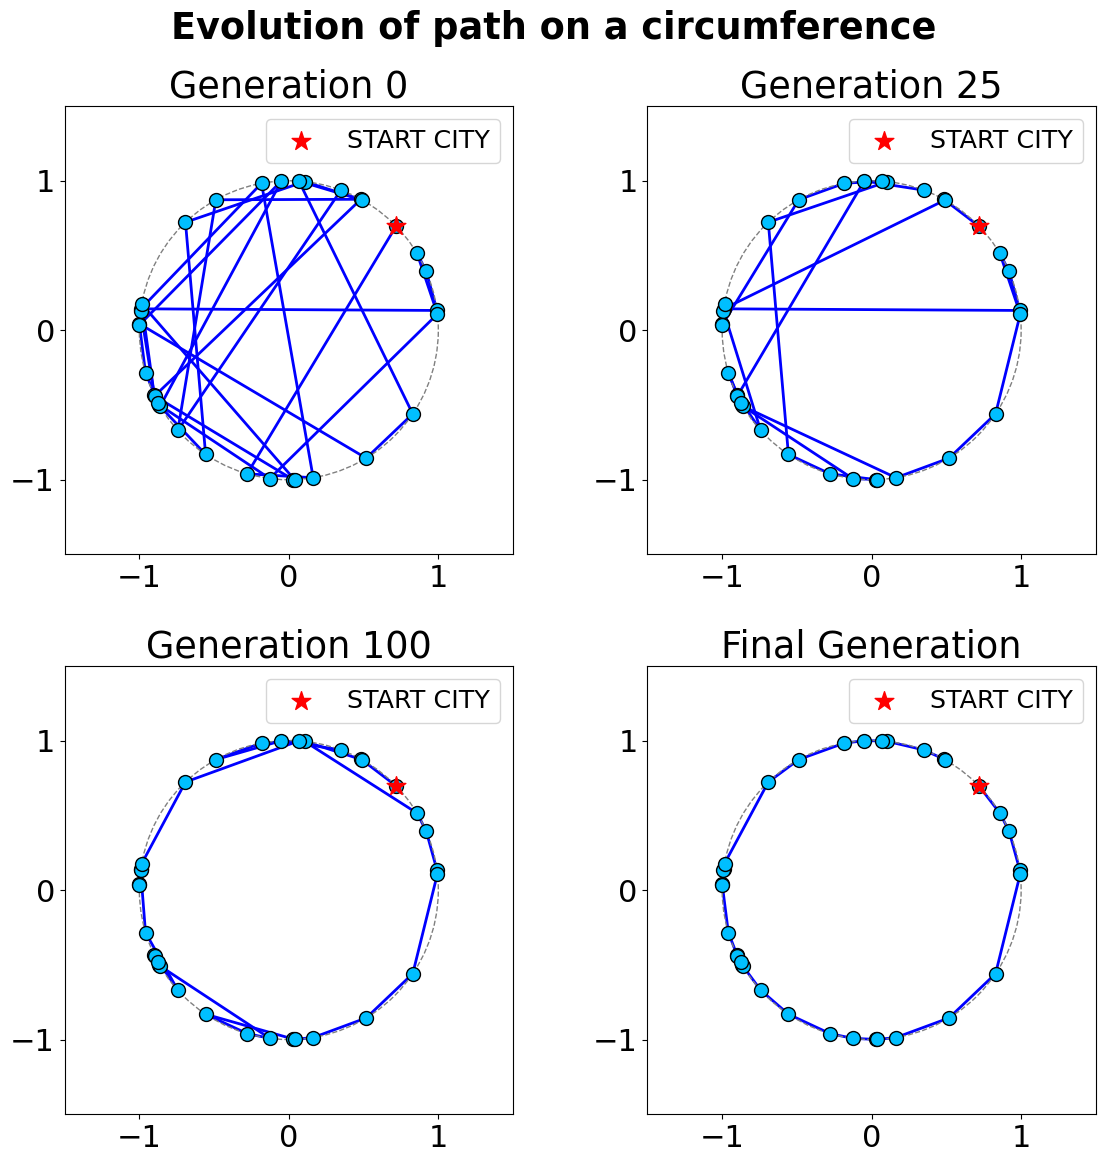

In [4]:
dict = pd.read_csv('CIRCUMFERENCE/OUTPUT/cities.dat', sep="\s+")
dict.sort_values(by='CITY_ID', inplace=True)
dict.reset_index(drop=True, inplace=True)
dict['x'] = np.cos(dict['ANGLE'])
dict['y'] = np.sin(dict['ANGLE'])

paths = np.loadtxt('CIRCUMFERENCE/OUTPUT/best_path.dat', dtype=int, skiprows=1)

# index of visual paths
indices = [0, 10, 25, -1]
titles = ["Generation 0", "Generation 25", "Generation 100", "Final Generation"]

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()

for idx, ax in enumerate(axs):
    path = paths[indices[idx]]

    ax.scatter(dict['x'], dict['y'], s=100, color='deepskyblue', edgecolor='black', zorder=2)

    # red star
    start_city = dict[dict['CITY_ID'] == path[0]]
    ax.scatter(start_city['x'], start_city['y'], color='red', marker='*', s=200, zorder=3, label='START CITY')

    # path
    for i in range(len(path)-1):
        from_city = dict[dict['CITY_ID'] == path[i]]
        to_city = dict[dict['CITY_ID'] == path[i+1]]
        
        ax.plot([from_city['x'].values[0], to_city['x'].values[0]],
                [from_city['y'].values[0], to_city['y'].values[0]],
                color='blue', linewidth=2, zorder=1)

    circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
    ax.add_artist(circle)

    ax.set_title(titles[idx])
    ax.set_aspect('equal')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.legend(loc='upper right', fontsize='small')
    
    ax.set_xticks([-1, 0, 1])
    ax.set_yticks([-1, 0, 1])
    
fig.suptitle("Evolution of path on a circumference", fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.90)  
plt.show()

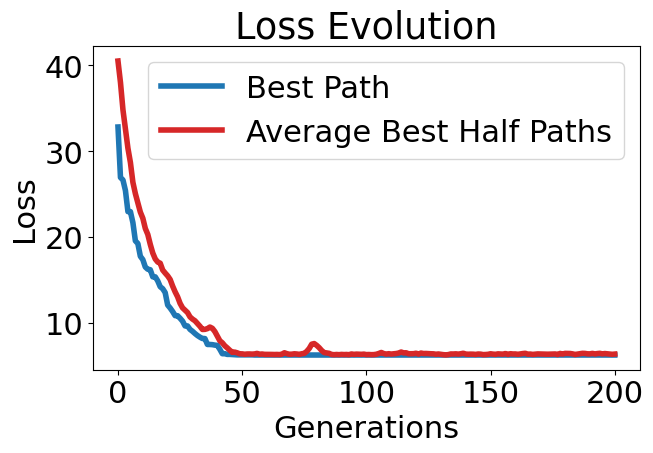

In [5]:
loss = np.loadtxt('CIRCUMFERENCE/OUTPUT/loss.dat', skiprows=1)

plt.figure(figsize=(7, 5))
plt.plot(loss[:, 0], loss[:, 1], color='tab:blue', linewidth=4, label='Best Path')
plt.plot(loss[:,0], loss[:,2], color='tab:red', linewidth=4,  label='Average Best Half Paths')
plt.title('Loss Evolution')
plt.xlabel('Generations')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


#### Square

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Utente\AppData\Local\Temp\ipykernel_16808\3982665757.py:1: SyntaxWarning: invalid escape sequence '\s'
  dict = pd.read_csv('SQUARE/OUTPUT/cities.dat', sep="\s+")


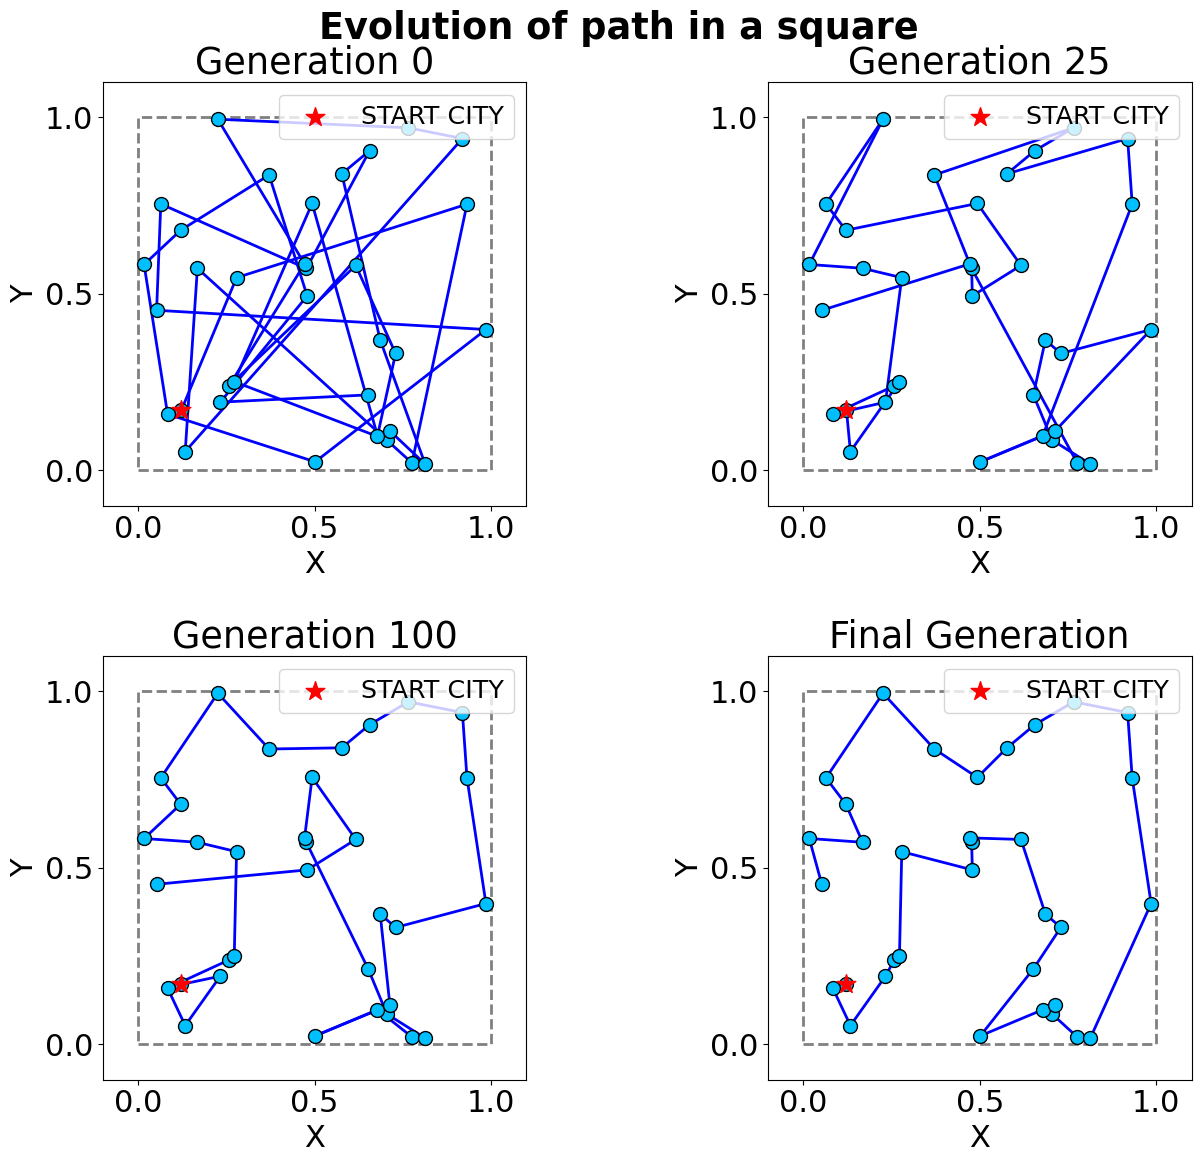

In [6]:
dict = pd.read_csv('SQUARE/OUTPUT/cities.dat', sep="\s+")
dict.sort_values(by='CITY_ID', inplace=True)
dict.reset_index(drop=True, inplace=True)

# Carica i percorsi
paths = np.loadtxt('SQUARE/OUTPUT/best_path.dat', dtype=int, skiprows=1)

# index of visual paths
indices = [0, 10, 25, -1]
titles = ["Generation 0", "Generation 25", "Generation 100", "Final Generation"]

fig, axs = plt.subplots(2, 2, figsize=(14, 12))
axs = axs.flatten()

for idx, ax in enumerate(axs):
    path = paths[indices[idx]]
    
    ax.scatter(dict['X'], dict['Y'], s=100, color='deepskyblue', edgecolor='black', zorder=3)
    
    # red star per la città di partenza
    start_city = dict[dict['CITY_ID'] == path[0]]
    ax.scatter(start_city['X'], start_city['Y'], color='red', marker='*', s=200, zorder=4, label='START CITY')
    
    # # Etichette città
    # for _, row in dict.iterrows():
    #     ax.text(row['X'] + 0.015, row['Y'] + 0.015, str(int(row['CITY_ID'])), 
    #             fontsize=8, ha='center', va='center', zorder=5)
    
    # path
    for i in range(len(path)-1):
        from_city = dict[dict['CITY_ID'] == path[i]]
        to_city = dict[dict['CITY_ID'] == path[i+1]]
        ax.plot([from_city['X'].values[0], to_city['X'].values[0]],
                [from_city['Y'].values[0], to_city['Y'].values[0]],
                color='blue', linewidth=2, zorder=2)

    # Evidenzia il quadrato
    square = plt.Rectangle((0, 0), 1, 1, edgecolor='gray', facecolor='none', linestyle='--', linewidth=2)
    ax.add_patch(square)

    ax.set_title(titles[idx])
    ax.set_aspect('equal')
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    
    ax.set_xticks([0, 0.5, 1])
    ax.set_yticks([0, 0.5, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right', fontsize='small')

fig.suptitle("Evolution of path in a square", fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Lascia spazio per il titolo principale
plt.show()

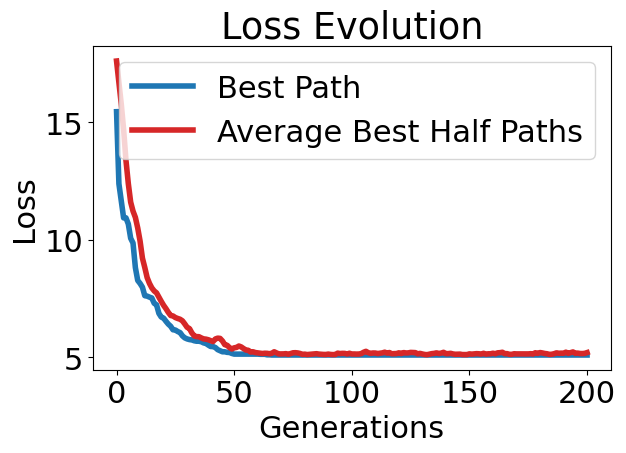

In [7]:
loss = np.loadtxt('SQUARE/OUTPUT/loss.dat', skiprows=1)

plt.figure(figsize=(7, 5))
plt.plot(loss[:, 0], loss[:, 1], color='tab:blue', linewidth=4, label='Best Path')
plt.plot(loss[:,0], loss[:,2], color='tab:red', linewidth=4,  label='Average Best Half Paths')
plt.title('Loss Evolution')
plt.xlabel('Generations')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

### Results 


For both problems analyzed, the Genetic Algorithm successfully converges to final solutions after all generations. By the end of the evolutionary process, the paths obtained exhibit no intersections between lines, strongly suggesting that the algorithm has approached a near-optimal configuration of the cities.
This qualitative result is further confirmed by the analysis of the loss function plots over generations. Both the average loss across the population and the best loss consistently decrease throughout the evolution, clearly indicating that the population is converging towards better solutions.

The combination of well-designed crossover, diverse mutation operators, and strong selection pressure has enabled the GA to effectively optimize the TSP instances, leading to high-quality solutions with robust convergence behavior.